In [1]:
# pip install scikit-learn==1.1.0

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error

#load_data 
df=pd.read_excel("FG-FC.xlsx")
df2=pd.read_excel("FG_WC.xlsx")
print(df.shape)
df.head(5)

(40, 12)


,Temperature (oC),Mass(gm),Vp(km/s),Vs(km/s),Φ (%),Vv (cc/gm),Unnamed: 6,DmL,VpL,VsL,ΦL,VvL
0,25,43.2990,5.77500,3.35700,0.397000,0.001507,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,50,43.2947,5.72367,3.33733,0.563667,0.002170,NaN,0.000099,0.008888,0.005859,0.419816,0.439947
2,75,43.2903,5.67233,3.31767,0.730333,0.002833,NaN,0.000201,0.017778,0.011716,0.839630,0.879894
3,100,43.2860,5.62100,3.29800,0.897000,0.003496,NaN,0.000300,0.026667,0.017575,1.259446,1.319841
4,125,43.2773,5.40450,3.19975,0.942250,0.003643,NaN,0.000501,0.064156,0.046842,1.373426,1.417386


In [3]:
df2.head()

,Temperature(oC),mass(gm),Vp(km/s),Vs(km/s),Φ (%),Vv(cc/gm),Unnamed: 6,DmL,VpL,VsL,ΦL,VvL
0,25,44.1990,5.79200,3.25400,0.471000,0.001786,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,50,44.1980,5.65967,3.20333,0.626333,0.002421,NaN,0.000023,0.022847,0.015572,0.329794,0.355358
2,75,44.1970,5.52733,3.15267,0.781667,0.003055,NaN,0.000045,0.045696,0.031140,0.659590,0.710711
3,100,44.1960,5.39500,3.10200,0.937000,0.003690,NaN,0.000068,0.068543,0.046712,0.989384,1.066069
4,125,44.1947,5.31775,3.05400,1.014500,0.003964,NaN,0.000097,0.081880,0.061463,1.153928,1.219625


In [4]:
df.drop(['Unnamed: 6','DmL','VpL','VsL','VvL','ΦL','Vv (cc/gm)'],axis= 'columns',inplace=True)

In [5]:
df2.drop(['Unnamed: 6','DmL','VpL','VsL','VvL','ΦL','Vv(cc/gm)'],axis= 'columns',inplace=True)

In [6]:
df.rename(columns={'Temperature (oC)':'Temperature(°C)','Mass(gm) ':'Mass','Vp(km/s)':'P-wave velocity','Vs(km/s)':'S-wave velocity','Φ (%)':'Porosity(%)'},inplace=True)

In [7]:
df2.rename(columns={'Temperature(oC) ':'Temperature(°C)','mass(gm)':'Mass','Vp(km/s)':'P-wave velocity','Vs(km/s)':'S-wave velocity','Φ (%)':'Porosity(%)'},inplace=True)

In [8]:
df

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
0,25,43.2990,5.775000,3.357000,0.397000
1,50,43.2947,5.723670,3.337330,0.563667
2,75,43.2903,5.672330,3.317670,0.730333
3,100,43.2860,5.621000,3.298000,0.897000
4,125,43.2773,5.404500,3.199750,0.942250
5,150,43.2685,5.188000,3.101500,0.987500
6,175,43.2597,4.971500,3.003250,1.032750
7,200,43.2510,4.755000,2.905000,1.078000
8,225,43.2455,4.619500,2.883570,1.328250
9,250,43.2400,4.484000,2.862150,1.578500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature(°C)  40 non-null     int64  
 1   Mass             40 non-null     float64
 2   P-wave velocity  40 non-null     float64
 3   S-wave velocity  40 non-null     float64
 4   Porosity(%)      40 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.7 KB


In [10]:
df.describe()

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,512.500000,43.128690,2.774074,1.721306,3.305000
std,292.261299,0.136421,1.899514,1.177115,2.265833
min,25.000000,42.829000,0.369021,0.221412,0.397000
25%,268.750000,43.008325,0.927441,0.556465,1.766188
50%,512.500000,43.192000,2.503875,1.502325,3.202250
75%,756.250000,43.235875,4.382375,2.846078,3.452937
max,1000.000000,43.299000,5.775000,3.357000,10.361000


In [11]:
df.corr()

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
Temperature(°C),1.000000,-0.967940,-0.984118,-0.972262,0.880140
Mass,-0.967940,1.000000,0.936356,0.935400,-0.899805
P-wave velocity,-0.984118,0.936356,1.000000,0.994631,-0.801088
S-wave velocity,-0.972262,0.935400,0.994631,1.000000,-0.786768
Porosity(%),0.880140,-0.899805,-0.801088,-0.786768,1.000000


In [12]:
df2

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
0,25,44.1990,5.792000,3.254000,0.471000
1,50,44.1980,5.659670,3.203330,0.626333
2,75,44.1970,5.527330,3.152670,0.781667
3,100,44.1960,5.395000,3.102000,0.937000
4,125,44.1947,5.317750,3.054000,1.014500
5,150,44.1935,5.240500,3.006000,1.092000
6,175,44.1923,5.163250,2.958000,1.169500
7,200,44.1910,5.086000,2.910000,1.247000
8,225,44.1900,4.817500,2.906500,1.431750
9,250,44.1890,4.549000,2.903000,1.616500


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature(°C)  40 non-null     int64  
 1   Mass             40 non-null     float64
 2   P-wave velocity  40 non-null     float64
 3   S-wave velocity  40 non-null     float64
 4   Porosity(%)      40 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.7 KB


In [14]:
df2.describe()

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity(%)
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,512.500000,44.121088,2.800473,1.662851,3.667150
std,292.261299,0.086971,1.788582,1.054270,2.607353
min,25.000000,43.899000,0.593735,0.356241,0.471000
25%,268.750000,44.095950,1.132275,0.679364,1.755062
50%,512.500000,44.154400,2.389000,1.433400,3.157000
75%,756.250000,44.188250,4.347625,2.900375,4.754125
max,1000.000000,44.199000,5.792000,3.254000,10.757000


In [15]:
# df_combined.describe()

In [16]:
# df_combined2.describe()

In [17]:
#making a copy of each dataframe
data_FG_FC=df
data_FG_WC=df2

In [18]:
# #size of plot
# plt.subplots(figsize=(15,15))

# plt.plot(df.Temp,df.Phi,color='Red')
# plt.scatter(df.Temp,df.Phi,color='Red')
# plt.plot(df.Temp,df2.Phi,color='Blue')
# plt.scatter(df.Temp,df2.Phi,color='Blue')


# #curve representation
# plt.legend(['Furnace cooling','Water cooling'],fontsize=25)
# plt.xlabel("Temperature(oC)")
# plt.ylabel("Porosity(%)")
# plt.show()

In [19]:
df_combined=pd.read_excel('furnace_cooling_combined.xlsx')
df_combined.head()

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity (%),Species
0,25,43.2990,5.77500,3.35700,0.397000,Fine grain
1,50,43.2947,5.72367,3.33733,0.563667,Fine grain
2,75,43.2903,5.67233,3.31767,0.730333,Fine grain
3,100,43.2860,5.62100,3.29800,0.897000,Fine grain
4,125,43.2773,5.40450,3.19975,0.942250,Fine grain


In [20]:
df_combined2=pd.read_excel('water_cooling_combined.xlsx')
df_combined2.head()

,Temperature,Mass,P-wave velocity,S-wave velocity,Porosity (%),Species
0,25,44.1990,5.79200,3.25400,0.471000,Fine grain
1,50,44.1980,5.65967,3.20333,0.626333,Fine grain
2,75,44.1970,5.52733,3.15267,0.781667,Fine grain
3,100,44.1960,5.39500,3.10200,0.937000,Fine grain
4,125,44.1947,5.31775,3.05400,1.014500,Fine grain


In [21]:
df_combined2.describe()

,Temperature,Mass,P-wave velocity,S-wave velocity,Porosity (%)
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,496.982759,40.310036,2.860633,1.678688,4.276375
std,282.114592,2.804825,1.790503,1.000835,2.593302
min,25.000000,37.500000,0.381240,0.228744,0.363000
25%,250.000000,38.115625,1.166525,0.699914,2.333063
50%,500.000000,38.899750,2.603125,1.597800,3.866625
75%,731.250000,44.097050,4.622188,2.594250,5.423312
max,1000.000000,44.199000,6.112000,3.254000,11.130000


In [22]:
# iris=sns.load_dataset('iris')

In [23]:
# iris.head()

In [24]:
# x=sns.pairplot(df_combined,hue='Species',kind='reg')
# x.fig.suptitle('Pairwise correlation for Fine grain sample',y=1.03)

Text(0.5, 1.03, 'Pairwise plots for Furnace cooling')

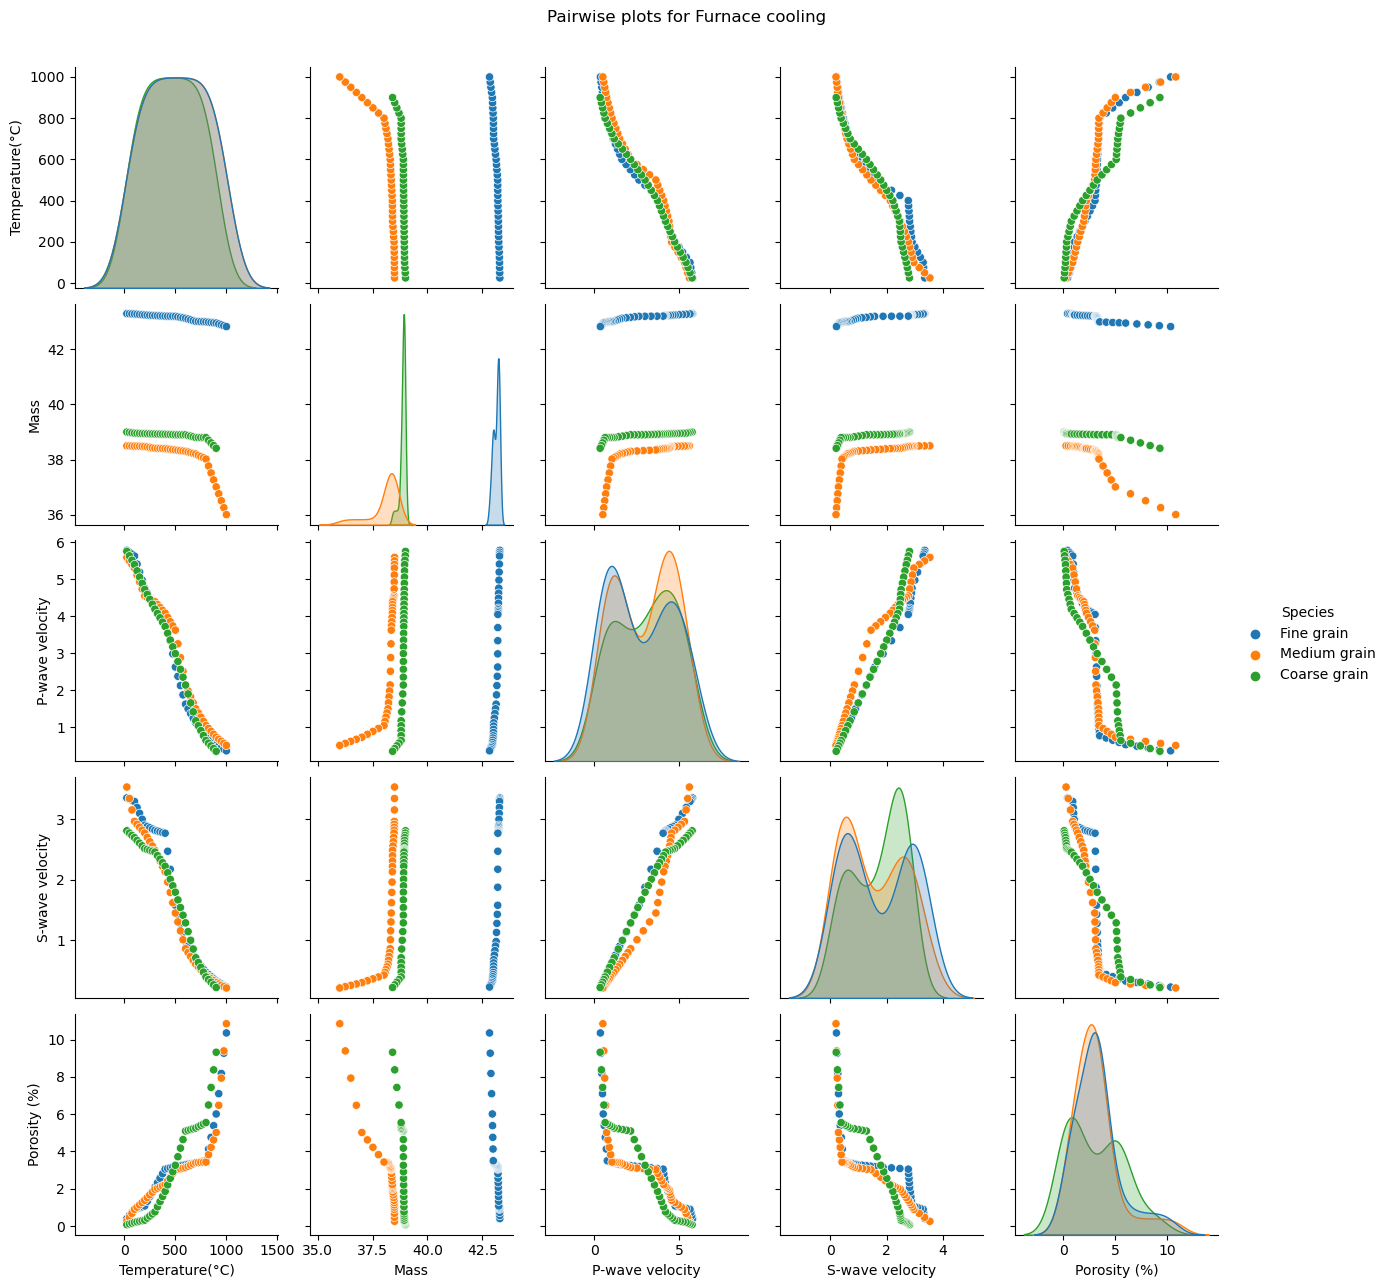

In [25]:

x=sns.pairplot(df_combined,hue='Species')
x.fig.suptitle('Pairwise plots for Furnace cooling',y=1.03)

# plt.savefig('water_cool.png')

In [26]:
df_combined.describe()

,Temperature(°C),Mass,P-wave velocity,S-wave velocity,Porosity (%)
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,496.982759,40.057315,2.929716,1.655263,3.188336
std,282.114592,2.296622,1.784751,1.061572,2.369382
min,25.000000,36.002000,0.356542,0.206006,0.072000
25%,250.000000,38.410750,1.105253,0.566031,1.323312
50%,500.000000,38.907750,3.080500,1.643325,3.098125
75%,731.250000,43.010675,4.457125,2.664062,4.143625
max,1000.000000,43.299000,5.775000,3.538000,10.856000


In [27]:
type(x)



seaborn.axisgrid.PairGrid

Text(0.5, 1.03, 'Pairwise correlation for Water cooling')

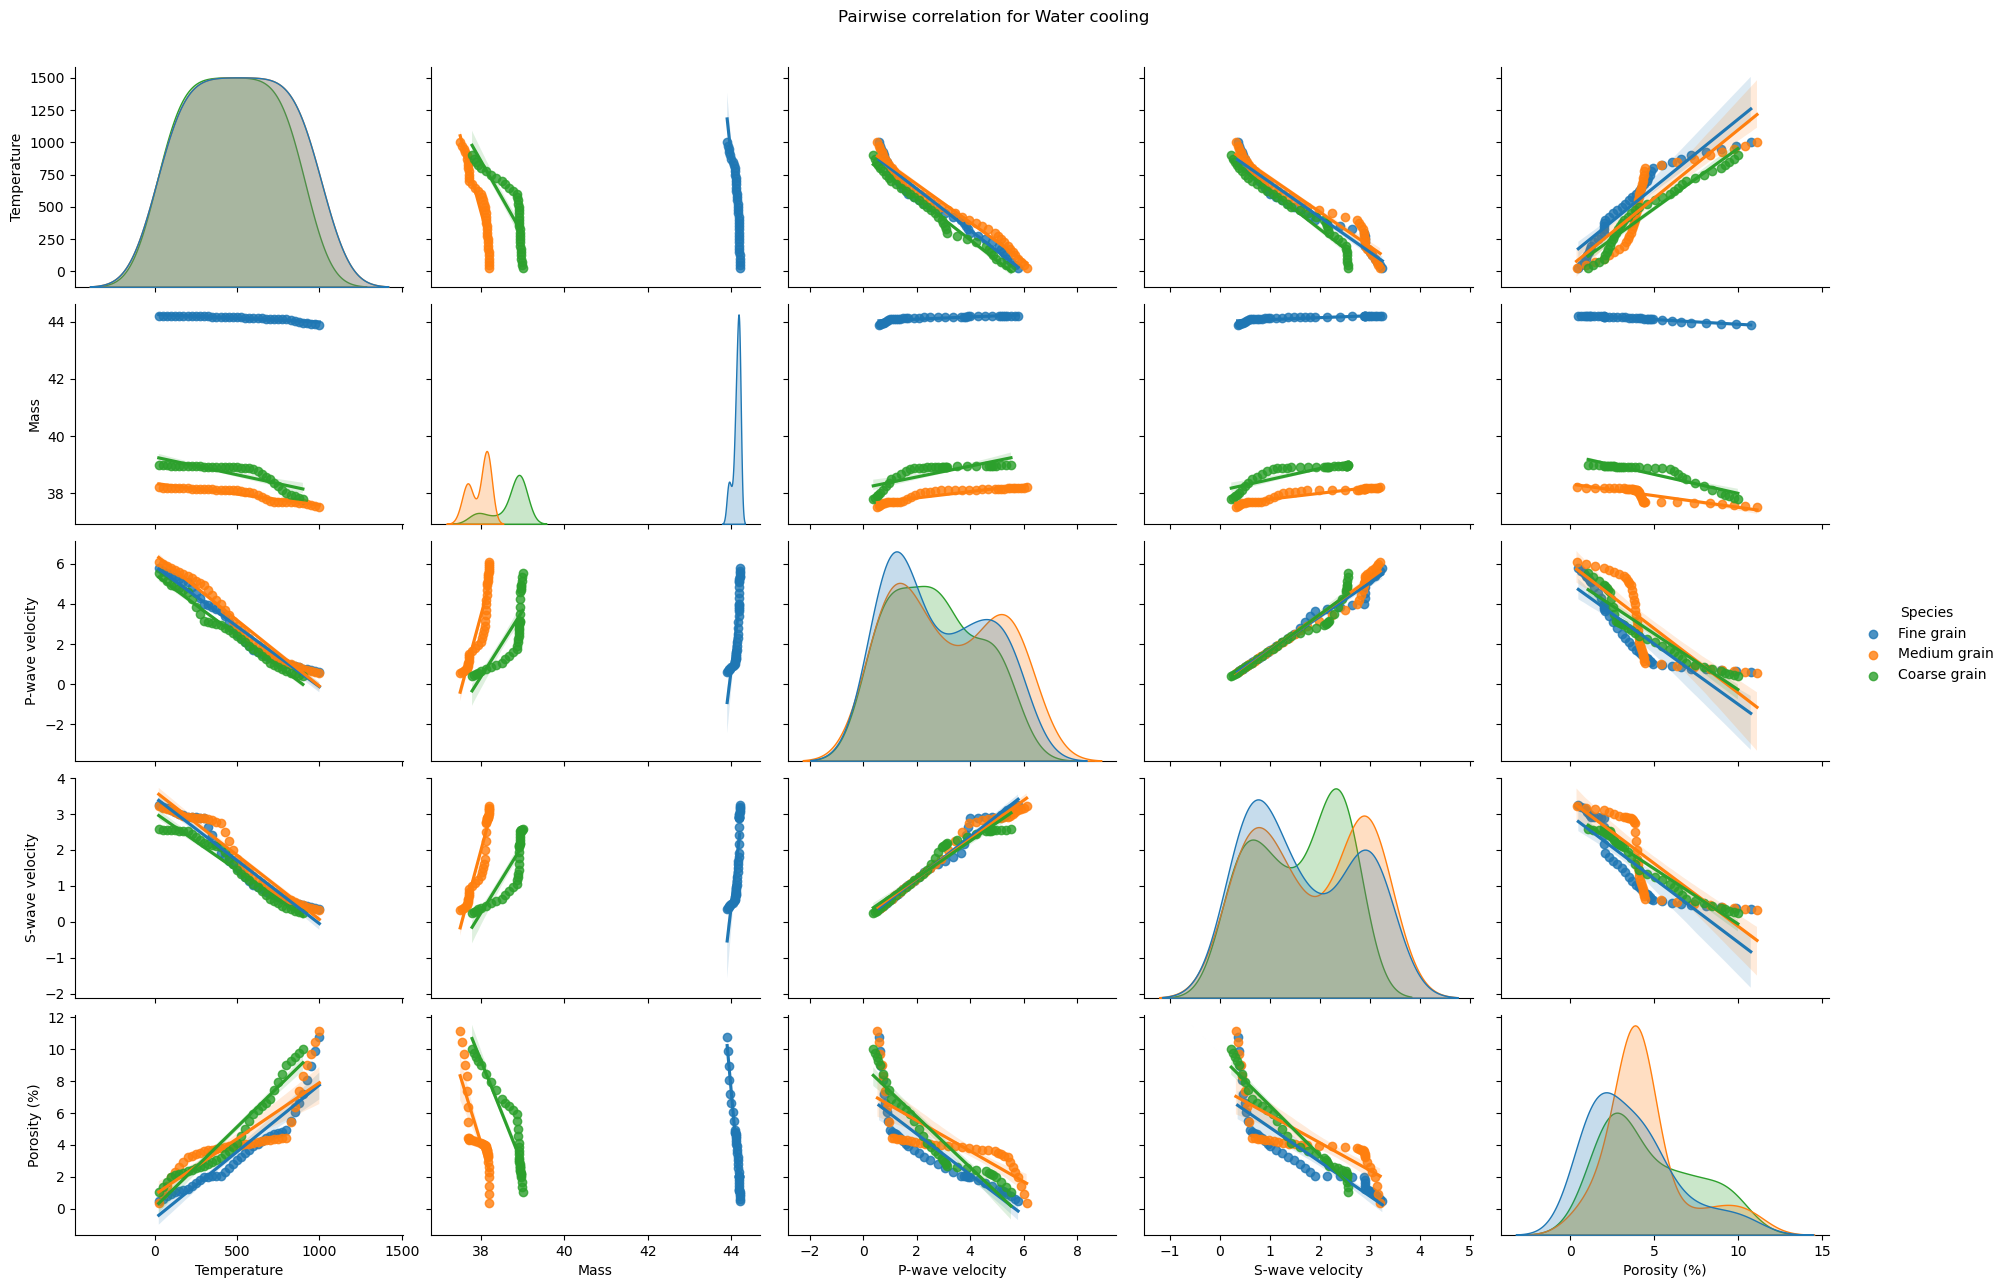

In [28]:
x=sns.pairplot(df_combined2,hue='Species',kind='reg',aspect=1.5)
x.fig.suptitle('Pairwise correlation for Water cooling',y=1.03)

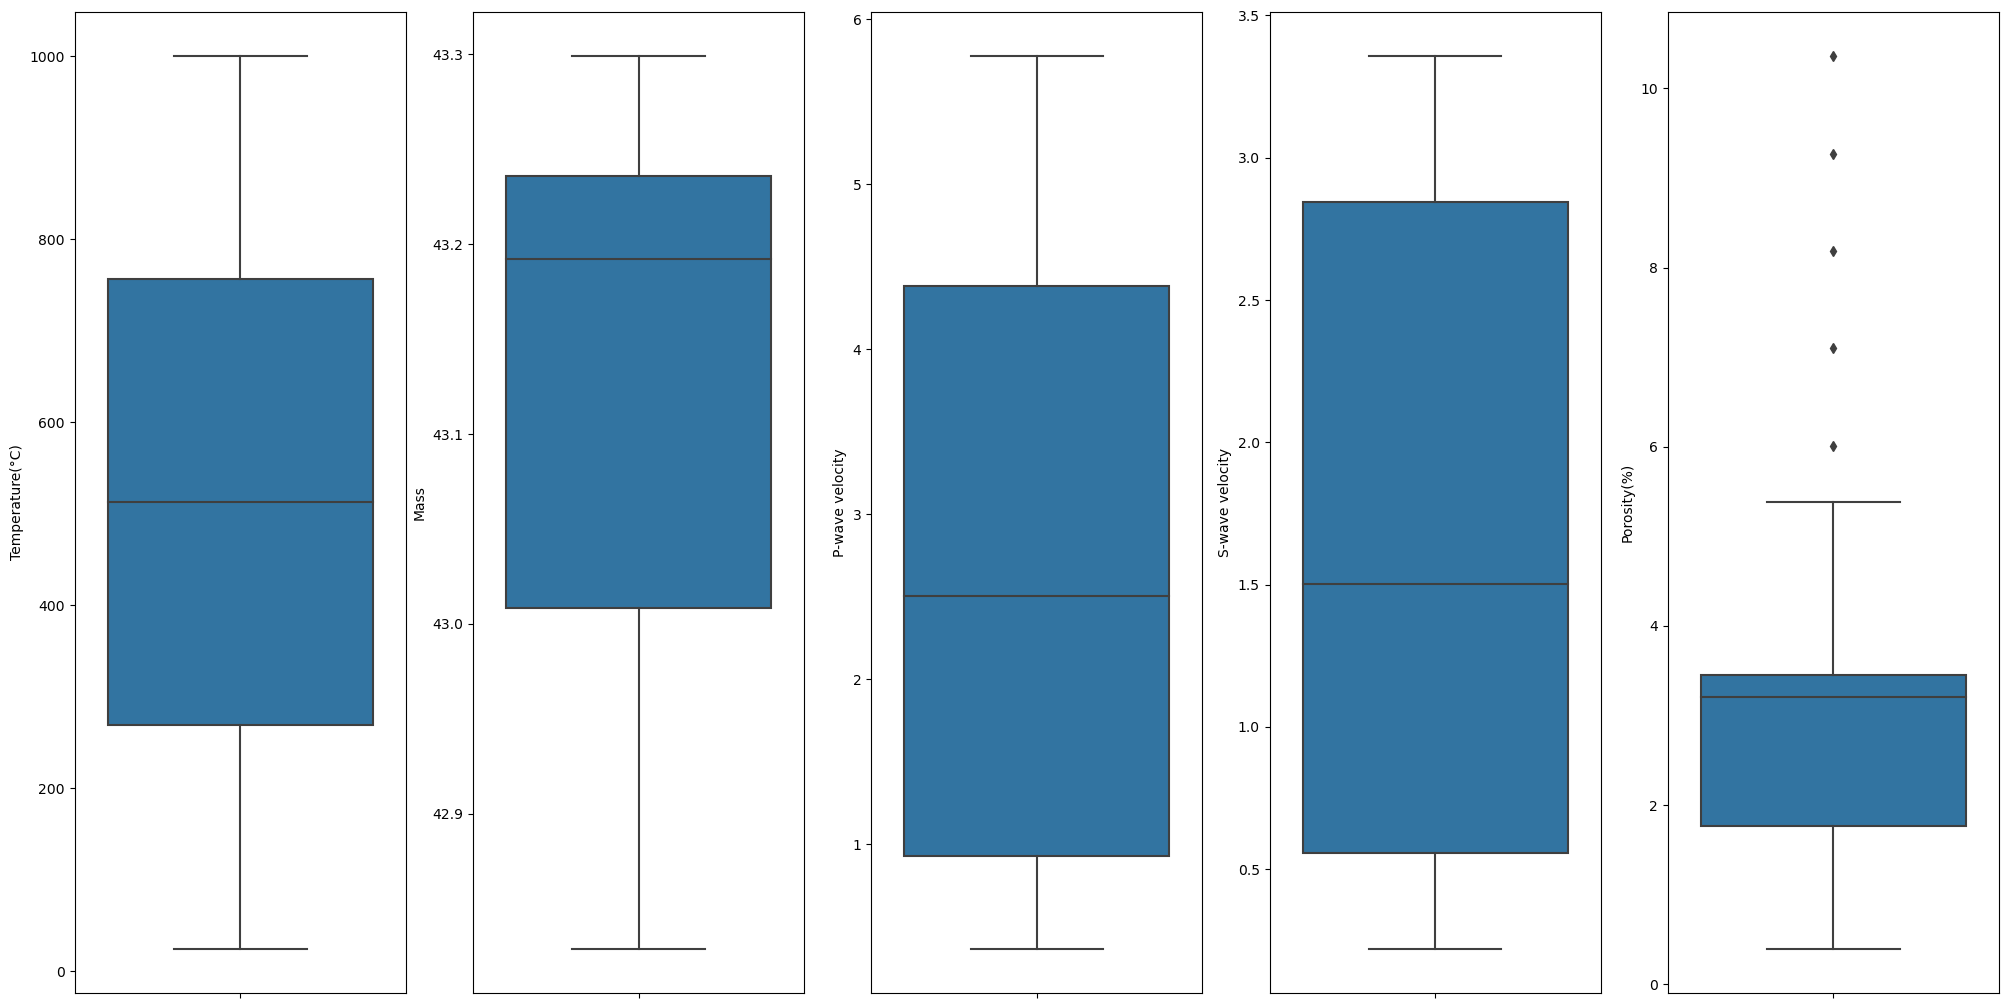

In [29]:
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [30]:
# pp=sns.pairplot(df,kind="reg")
# pp.fig.suptitle("Pairwise correlation for Fine-grain Furnace Cooling",y=1.02)


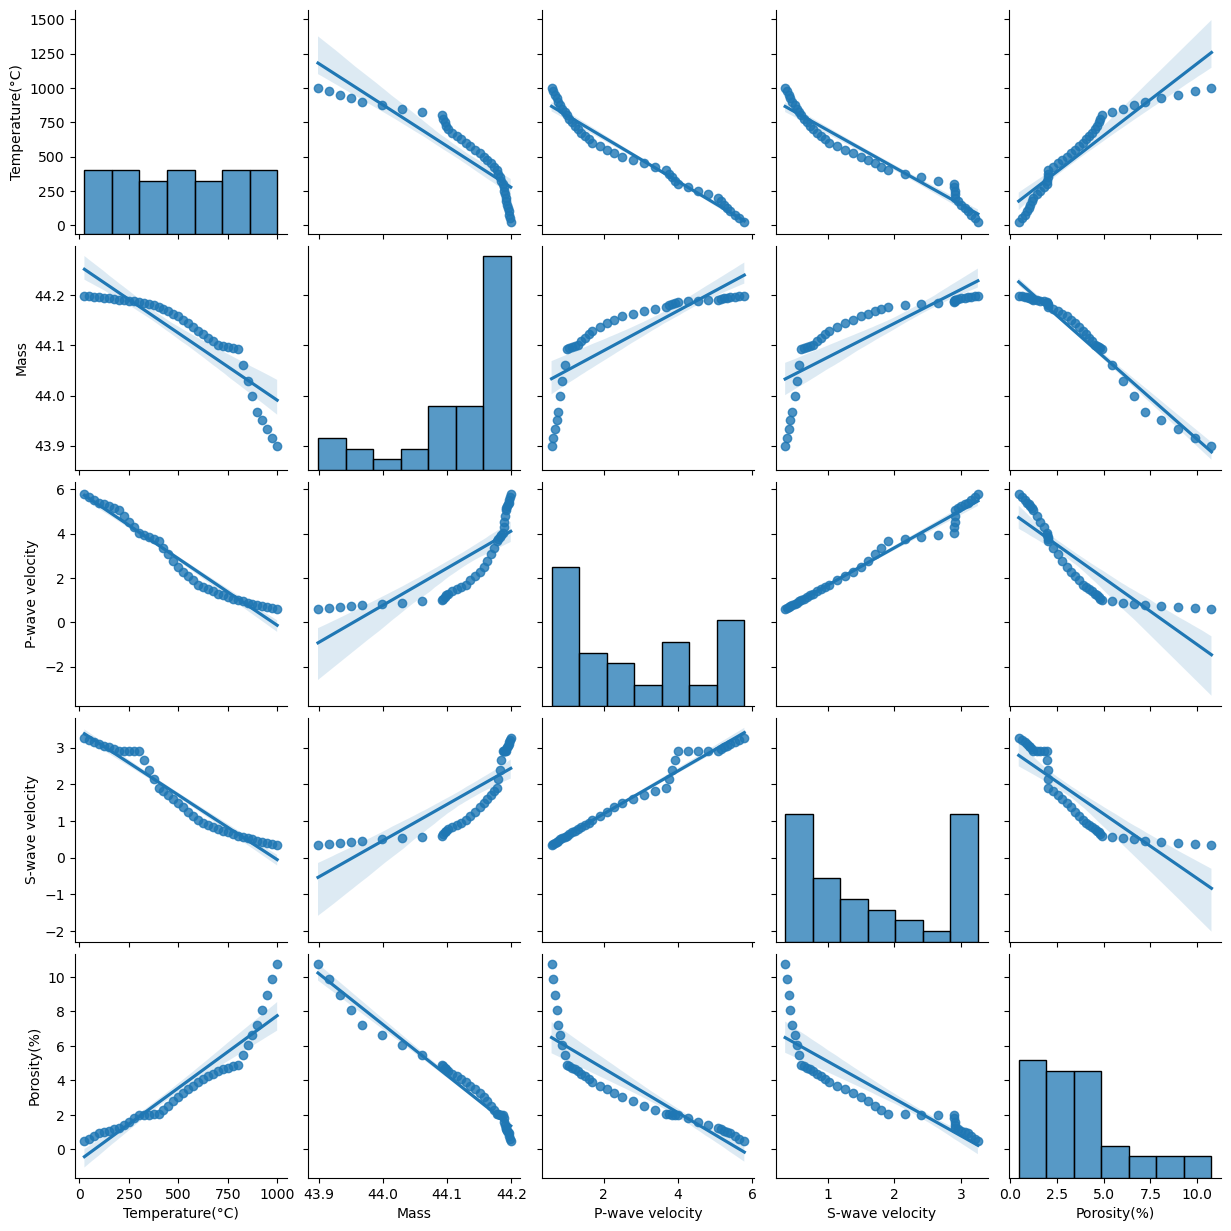

In [31]:
sns.pairplot(df2,kind="reg")

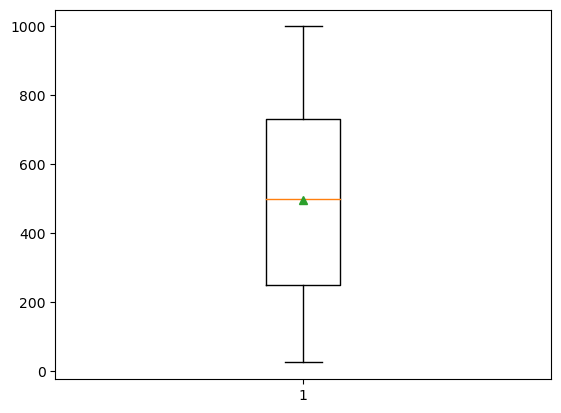

In [32]:
# box plot 
plt.boxplot(df_combined[['Temperature(°C)']] , showmeans=True , ) 
plt.show()

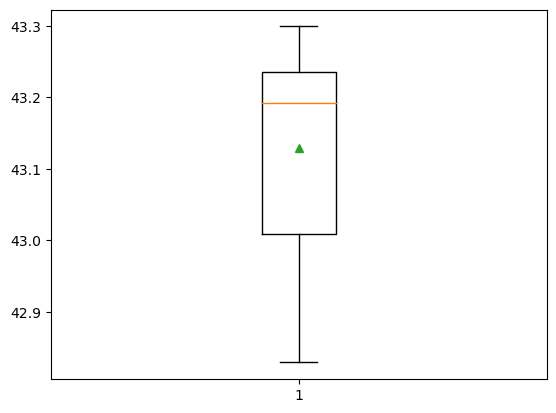

In [33]:
# box plot 
plt.boxplot(df[['Mass']] , showmeans=True , ) 
plt.show()

C:\Users\prasa\AppData\Local\Temp\ipykernel_27908\2017582827.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(df_combined2['Mass'], shade=True, color="b")


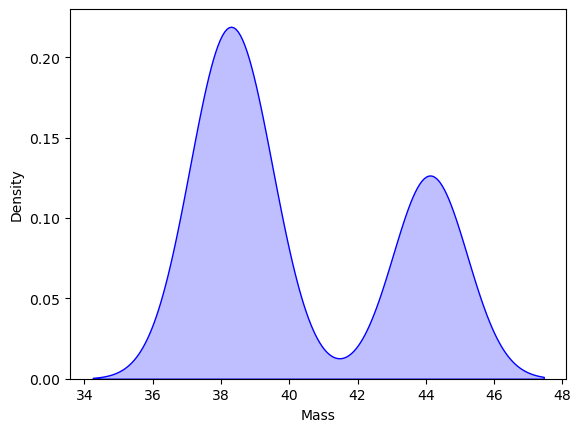

In [34]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
# sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
# fig = sns.kdeplot(df_combined['Temperature(°C)'], shade=True, color="r")
fig = sns.kdeplot(df_combined2['Mass'], shade=True, color="b")
# fig = sns.kdeplot(df_combined2['P-wave velocity'], shade=True, color="purple")
# fig = sns.kdeplot(df_combined2['S-wave velocity'], shade=True, color="black")

plt.show()

In [35]:
# import matplotlib.pyplot as plt

# # Generate some data

# temp= df_combined[['Mass', 'P-wave velocity', 'S-wave velocity']]
# # Create the box plot
# plt.boxplot(temp)

# plt.show()


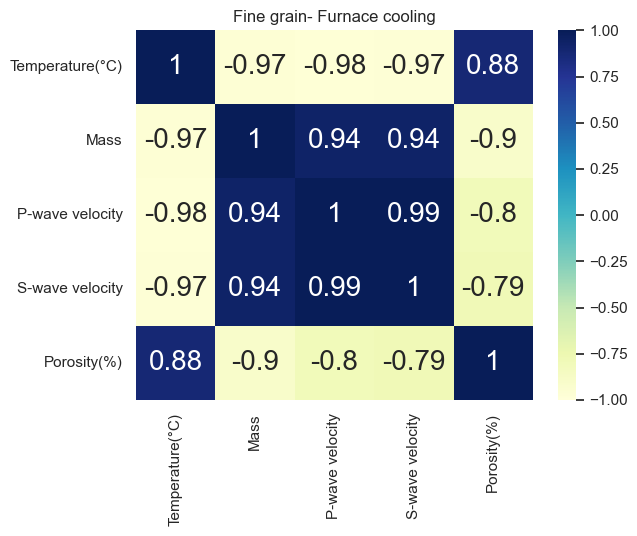

In [36]:
#heat map 
sns.set(font_scale=1)
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='YlGnBu',annot_kws={"size": 20})
plt.title("Fine grain- Furnace cooling")
plt.show()

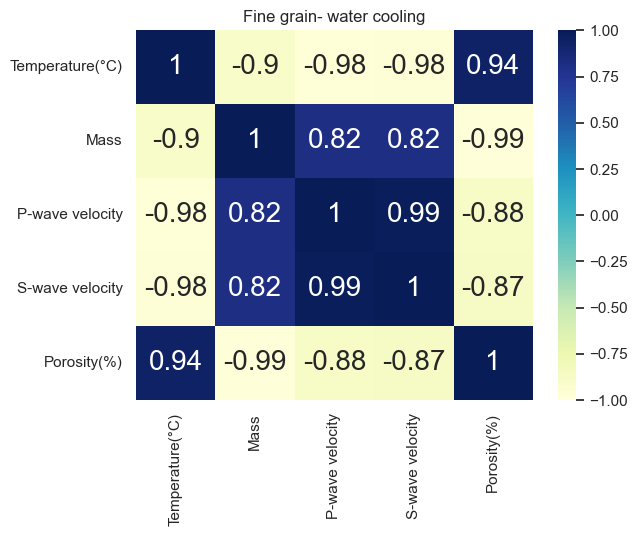

In [37]:
#heat map 
sns.set(font_scale=1)
sns.heatmap(df2.corr(),vmin=-1,vmax=1,annot=True,cmap='YlGnBu',annot_kws={"size": 20})
plt.title("Fine grain- water cooling")
plt.show()

In [38]:
#storing relevant features as inputs
#storing the 'DML' as output feature
inputs= df[['Temperature(°C)','Mass','P-wave velocity','S-wave velocity']]
output= df[['Porosity(%)']]

In [39]:
#storing relevant features as inputs
#storing the 'DML' as output feature
inputs2= df2[['Temperature(°C)','Mass','P-wave velocity','S-wave velocity']]
output2= df2[['Porosity(%)']]



In [40]:
#input features(independent variable)
inputs.head(5)

,Temperature(°C),Mass,P-wave velocity,S-wave velocity
0,25,43.2990,5.77500,3.35700
1,50,43.2947,5.72367,3.33733
2,75,43.2903,5.67233,3.31767
3,100,43.2860,5.62100,3.29800
4,125,43.2773,5.40450,3.19975


In [41]:
#output feature(dependent variable)
output.head(5)

,Porosity(%)
0,0.397000
1,0.563667
2,0.730333
3,0.897000
4,0.942250


In [42]:
#splitting the dataset into the training set and test set 
from sklearn.model_selection import train_test_split

input_train,input_test,output_train,output_test=train_test_split(inputs,output,test_size=0.2,random_state=0)

In [43]:
#splitting the dataset into the training set and test set 
from sklearn.model_selection import train_test_split

input_train2,input_test2,output_train2,output_test2=train_test_split(inputs2,output2,test_size=0.2,random_state=0)

In [44]:
#fitting multiple linear regression to the training set 
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(input_train, output_train)

LinearRegression()

In [45]:
#fitting multiple linear regression to the training set 
from sklearn import linear_model
regr2 = linear_model.LinearRegression()
regr2.fit(input_train2, output_train2)

LinearRegression()

In [46]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [66.43757117]
Coefficients: 
 [[ 0.02453319 -1.94294252  4.0053067  -1.78343472]]


In [47]:
print('Intercept: \n', regr2.intercept_)
print('Coefficients: \n', regr2.coef_)

Intercept: 
 [1033.18007328]
Coefficients: 
 [[ 1.46605254e-03 -2.33444067e+01 -5.22585937e-01  7.01285234e-01]]


In [48]:
phi_pred_FG_FC=regr.predict(input_test)
phi_pred_FG_FC

array([[2.22514228],
       [2.39762722],
       [2.7317414 ],
       [1.35904895],
       [1.53288864],
       [3.56003526],
       [3.69169288],
       [1.65238679]])

In [49]:
phi_pred_FG_WC=regr2.predict(input_test2)
phi_pred_FG_WC

array([[3.49732071],
       [3.04246382],
       [4.14231242],
       [1.02702116],
       [1.83704026],
       [1.90184488],
       [4.66017251],
       [2.0348958 ]])

In [50]:
#calculating accuracy metrics using R-square value 
from sklearn.metrics import r2_score 

score=r2_score(output_test,phi_pred_FG_FC)

In [51]:
#calculating accuracy metrics using R-square value 
from sklearn.metrics import r2_score 

score2=r2_score(output_test2,phi_pred_FG_WC)

In [52]:
score


0.5045201798732799

In [53]:
score2

0.989792342700761

In [54]:
input_test


,Temperature(°C),Mass,P-wave velocity,S-wave velocity
22,575,43.1470,1.87825,1.126950
20,525,43.1830,2.37875,1.427250
25,650,43.0740,1.37566,0.825396
4,125,43.2773,5.40450,3.199750
10,275,43.2345,4.34850,2.840720
15,400,43.2090,4.04600,2.772000
28,725,43.0142,1.03626,0.621758
11,300,43.2290,4.21300,2.819300


In [55]:
input_test2

,Temperature(°C),Mass,P-wave velocity,S-wave velocity
22,575,44.1362,1.88900,1.133400
20,525,44.1508,2.28900,1.373400
25,650,44.1150,1.49477,0.896859
4,125,44.1947,5.31775,3.054000
10,275,44.1880,4.28050,2.899500
15,400,44.1770,3.66800,1.908000
28,725,44.0987,1.22575,0.735450
11,300,44.1870,4.01200,2.896000


In [56]:
measured_FG_FC=output_test
measured_FG_WC=output_test2


In [57]:
measured_FG_FC=measured_FG_FC.to_numpy()
measured_FG_WC=measured_FG_WC.to_numpy()
measured_FG_FC

array([[3.2635 ],
       [3.2145 ],
       [3.337  ],
       [0.94225],
       [1.82875],
       [3.052  ],
       [3.41575],
       [2.079  ]])

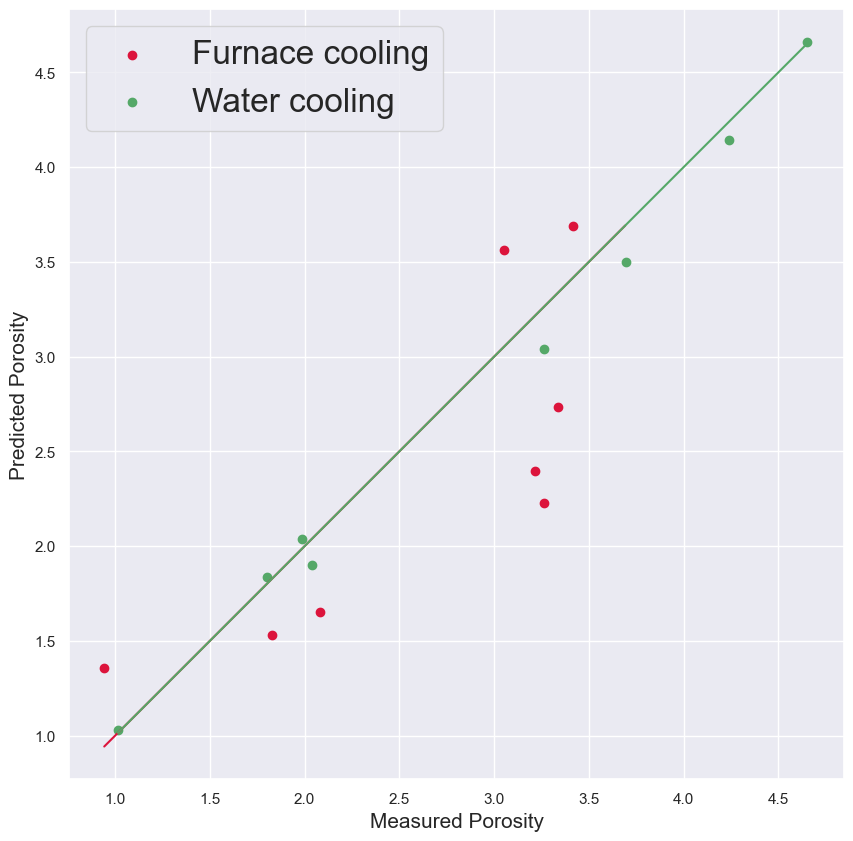

In [58]:

predicted_value=phi_pred_FG_FC
predicted_value2=phi_pred_FG_WC
measured=measured_FG_FC
measured2=measured_FG_WC
plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')

plt.axis('equal')
p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))
plt.plot([p1, p2], [p1, p2], 'crimson')
plt.plot([q1, q2], [q1, q2], 'g')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)

plt.show()

In [59]:
coef_table = pd.DataFrame(list(input_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",regr.coef_.transpose())


In [60]:
coef_table2 = pd.DataFrame(list(input_train2.columns)).copy()
coef_table2.insert(len(coef_table2.columns),"Coefs",regr2.coef_.transpose())


In [61]:
coef_table



,0,Coefs
0,Temperature(°C),0.024533
1,Mass,-1.942943
2,P-wave velocity,4.005307
3,S-wave velocity,-1.783435


In [62]:
coef_table2

,0,Coefs
0,Temperature(°C),0.001466
1,Mass,-23.344407
2,P-wave velocity,-0.522586
3,S-wave velocity,0.701285


In [63]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
clf = RandomForestRegressor(n_estimators = 80, random_state = 0)

# fit the regressor with x and y data
clf.fit(input_train, output_train.values.ravel())

RandomForestRegressor(n_estimators=80, random_state=0)

In [64]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
clf2 = RandomForestRegressor(n_estimators = 80, random_state = 0)

# fit the regressor with x and y data
clf2.fit(input_train2, output_train2.values.ravel())

RandomForestRegressor(n_estimators=80, random_state=0)

In [65]:
RF_pred_FG_FC = clf.predict(input_test) # test the output by changing values
RF_pred_FG_WC = clf2.predict(input_test2) # test the output by changing values

In [66]:
from sklearn.metrics import r2_score 

score_RF=r2_score(output_test,RF_pred_FG_FC)
score_RF

0.9808502771682589

In [67]:
from sklearn.metrics import r2_score 

score_RF2=r2_score(output_test2,RF_pred_FG_WC)
score_RF2

0.9931845623549441

Model using Random forest fits quite well !

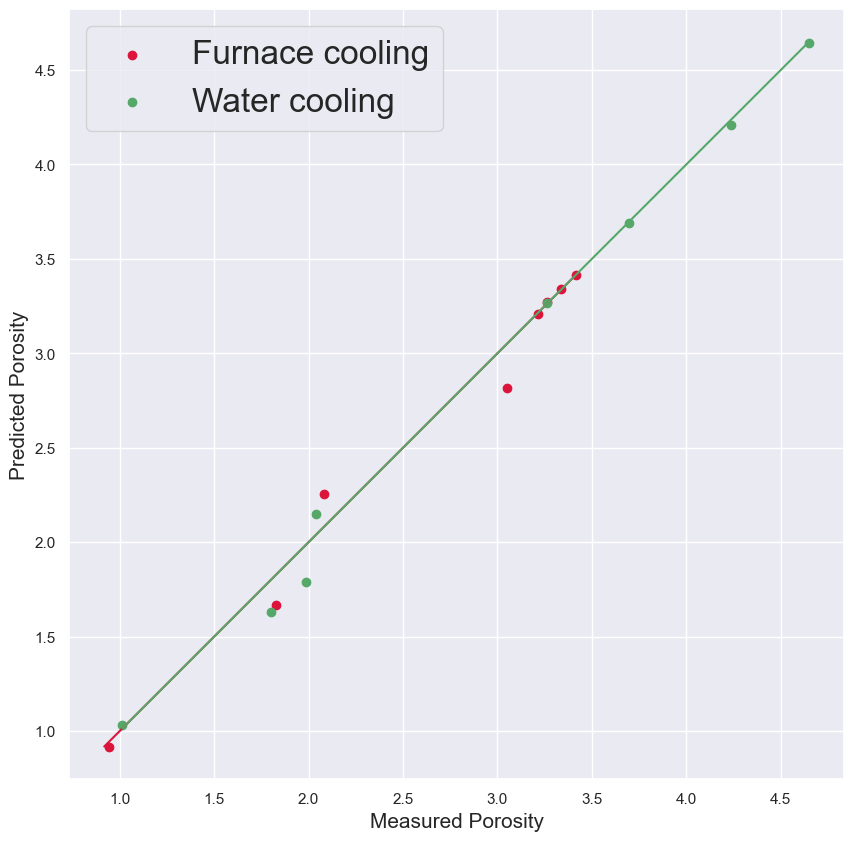

In [68]:
predicted_value=RF_pred_FG_FC
predicted_value2=RF_pred_FG_WC
measured=measured_FG_FC
measured2=measured_FG_WC
plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')

plt.axis('equal')
p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))
plt.plot([p1, p2], [p1, p2], 'crimson')
plt.plot([q1, q2], [q1, q2], 'g')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)

plt.show()

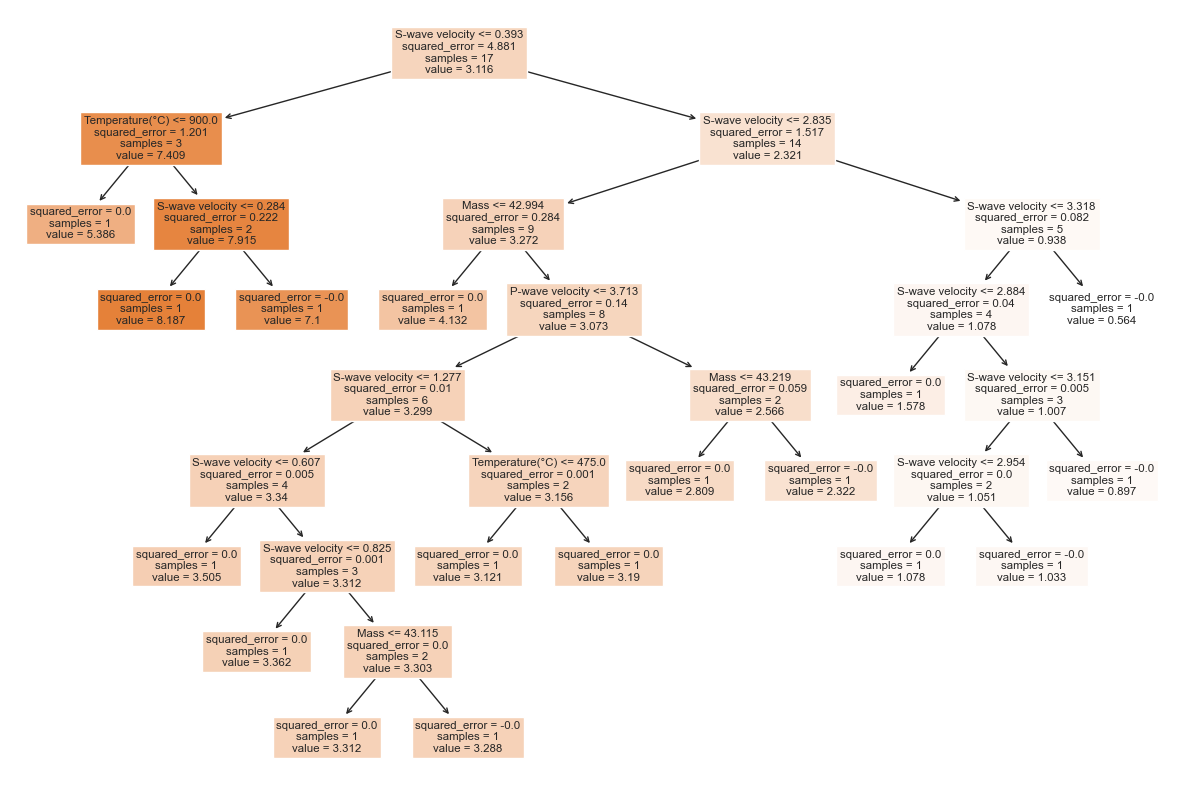

In [69]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[10],feature_names=df.columns,filled=True)
plt.savefig('out.pdf')

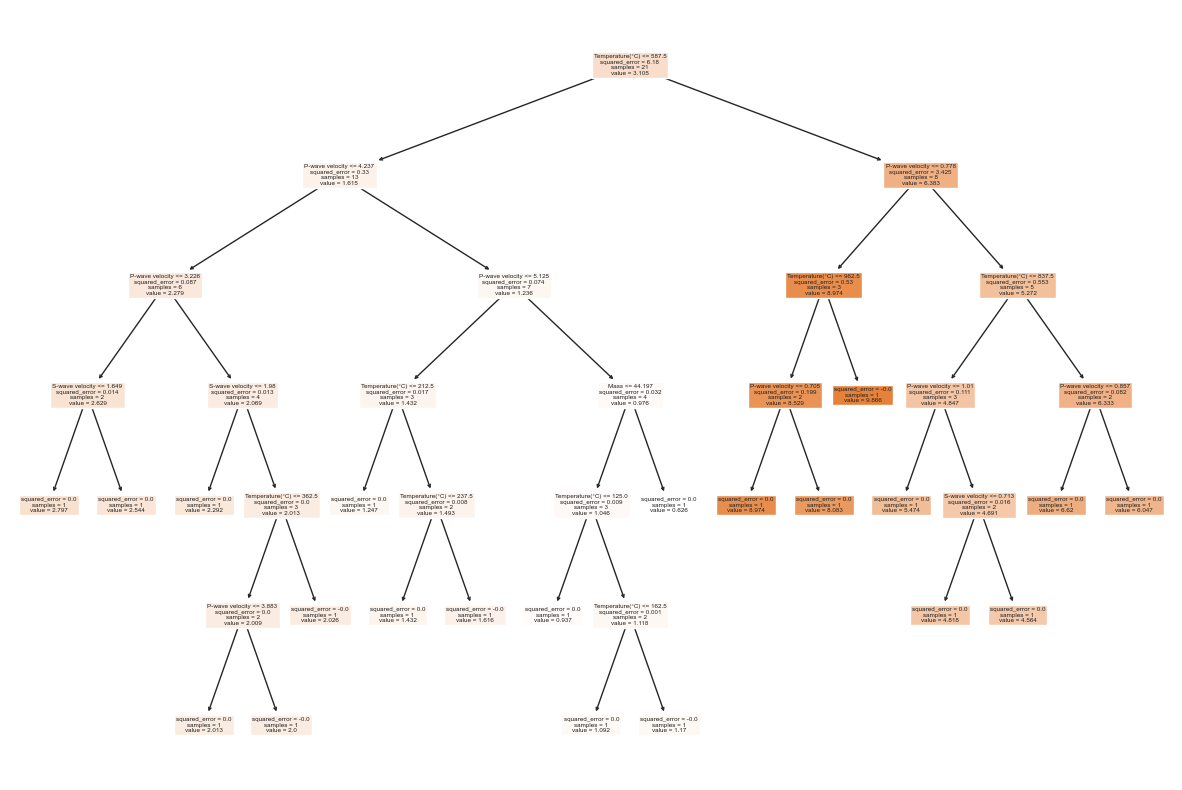

In [70]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf2.estimators_[1],feature_names=df2.columns,filled=True)
plt.savefig('out2.pdf')

In [71]:
#using knn model 
from sklearn.neighbors import KNeighborsRegressor 
# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=3,weights='distance')

# Fit and score
knn.fit(input_train, output_train)
knn_pred_FG_FC=knn.predict(input_test)


score_knn=r2_score(output_test,knn_pred_FG_FC)
score_knn

0.9888508652386709

In [72]:
#using knn model 
from sklearn.neighbors import KNeighborsRegressor 
# Initialize kNN
knn2 = KNeighborsRegressor(n_neighbors=3,weights='distance')

# Fit and score
knn2.fit(input_train2, output_train2)

knn_pred_FG_WC=knn2.predict(input_test2)


score_knn2=r2_score(output_test2,knn_pred_FG_WC)
score_knn2

0.9955155983248523

In [73]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(input_train, output_train)

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [74]:
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'linear')
regressor2.fit(input_train2, output_train2)

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [75]:
svr_pred_FG_FC=regressor.predict(input_test)
svr_pred_FG_WC=regressor2.predict(input_test2)

C:\Users\prasa\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


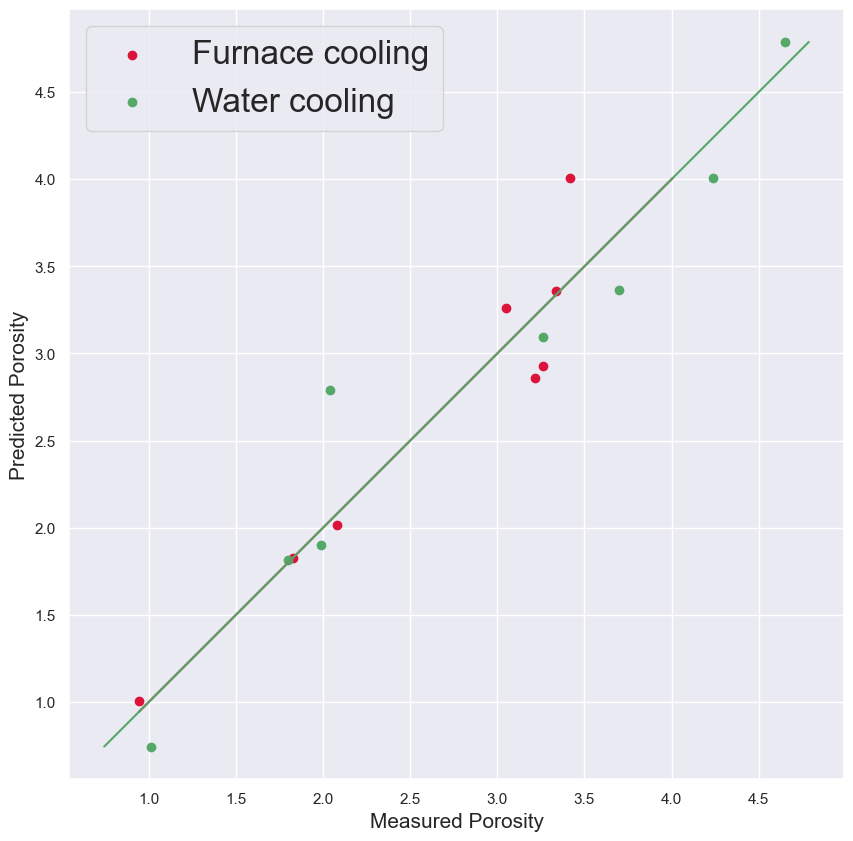

In [76]:
predicted_value=svr_pred_FG_FC
predicted_value2=svr_pred_FG_WC
measured=measured_FG_FC
measured2=measured_FG_WC
plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')

plt.axis('equal')
p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))
plt.plot([p1, p2], [p1, p2], 'crimson')
plt.plot([q1, q2], [q1, q2], 'g')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)

plt.show()

In [77]:
mse=mean_squared_error(output_test,svr_pred_FG_FC)
rmse=np.sqrt(mse)
rmse

0.28319356449515604

In [78]:
mse2=mean_squared_error(output_test2,svr_pred_FG_WC)
rmse2=np.sqrt(mse2)
rmse2

0.3269614805817846

In [79]:
from sklearn.metrics import r2_score 

score_svr=r2_score(output_test,svr_pred_FG_FC)
score_svr

0.8899754919576771

In [80]:
from sklearn.metrics import r2_score 

score_svr2=r2_score(output_test2,svr_pred_FG_WC)
score_svr2

0.928265772564971

In [81]:
regressor.coef_


array([[0.01462009, 0.01120361, 1.27189822, 0.08150417]])

In [82]:
regressor2.coef_

array([[ 0.01432051, -0.70204639,  1.01216781,  0.20433391]])

In [83]:
regressor.intercept_


array([-8.44296192])

In [84]:
regressor2.intercept_

array([23.97371289])

In [85]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(input_train, output_train)

y_pred_FG_FC = xgb_model.predict(input_test)

mse=mean_squared_error(output_test, y_pred_FG_FC)

print(np.sqrt(mse))

[09:45:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
0.12553600055805578


In [86]:
from sklearn.metrics import r2_score 

score_xgb=r2_score(output_test,y_pred_FG_FC)
score_xgb

0.9783798226406263

In [87]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(input_train2, output_train2)

y_pred_FG_WC = xgb_model.predict(input_test2)

mse=mean_squared_error(output_test2, y_pred_FG_WC)

print(np.sqrt(mse))

[09:45:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
0.17013755603576952


In [88]:
from sklearn.metrics import r2_score 

score_xgb2=r2_score(output_test2,y_pred_FG_WC)
score_xgb2

0.9805762257096458

C:\Users\prasa\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


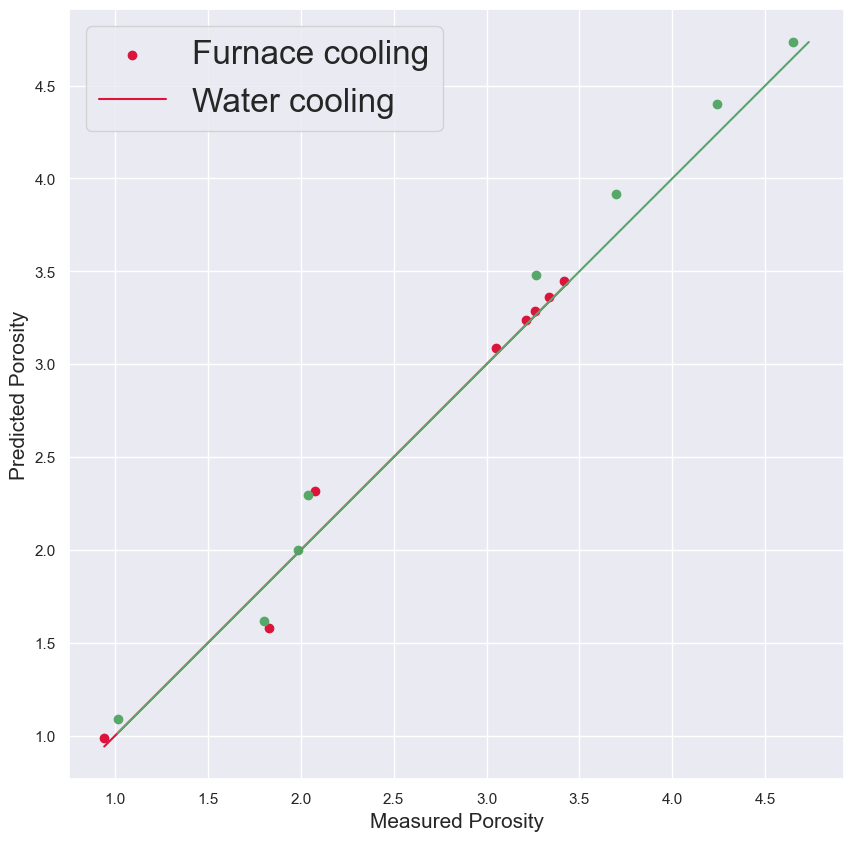

In [89]:
predicted_value=y_pred_FG_FC
predicted_value2=y_pred_FG_WC
measured=measured_FG_FC
measured2=measured_FG_WC
plt.figure(figsize=(10,10))
plt.scatter(measured, predicted_value, c='crimson')


p1 = max(max(predicted_value), max(measured))
p2 = min(min(predicted_value), min(measured))
plt.plot([p1, p2], [p1, p2], 'crimson')
plt.scatter(measured2, predicted_value2, c='g')
q1 = max(max(predicted_value2), max(measured2))
q2 = min(min(predicted_value2), min(measured2))

plt.plot([q1, q2], [q1, q2], 'g')
plt.xlabel('Measured Porosity', fontsize=15)
plt.ylabel('Predicted Porosity', fontsize=15)

plt.legend(['Furnace cooling','Water cooling'],fontsize=24)
plt.axis('equal')


plt.show()

In [90]:
#storing FC MLR, Random forest,SVR and XGBoost in order, predicted data 
#Furnace cooling
%store phi_pred_FG_FC
%store RF_pred_FG_FC
%store svr_pred_FG_FC
%store y_pred_FG_FC 
%store knn_pred_FG_FC

Stored 'phi_pred_FG_FC' (ndarray)
Stored 'RF_pred_FG_FC' (ndarray)
Stored 'svr_pred_FG_FC' (ndarray)
Stored 'y_pred_FG_FC' (ndarray)
Stored 'knn_pred_FG_FC' (ndarray)


In [91]:
#storing FC MLR, Random forest,SVR and XGBoost in order, predicted data 
#Water cooling
%store phi_pred_FG_WC
%store RF_pred_FG_WC
%store svr_pred_FG_WC
%store y_pred_FG_WC
%store knn_pred_FG_WC

Stored 'phi_pred_FG_WC' (ndarray)
Stored 'RF_pred_FG_WC' (ndarray)
Stored 'svr_pred_FG_WC' (ndarray)
Stored 'y_pred_FG_WC' (ndarray)
Stored 'knn_pred_FG_WC' (ndarray)


In [92]:
#measured data ,i.e. output_test data 
#furnace cooling
%store measured_FG_FC

#water cooling
%store measured_FG_WC

Stored 'measured_FG_FC' (ndarray)
Stored 'measured_FG_WC' (ndarray)


In [93]:
%store data_FG_FC
%store data_FG_WC

Stored 'data_FG_FC' (DataFrame)
Stored 'data_FG_WC' (DataFrame)
